1. Which  neighbourhoods in Seattle have the highest average rental prices?
2. What factors affect rental prices?
3. What amenities are most frequently provided in high-rated lisings?

In [38]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

### Config

In [39]:
calendar_path = 'data/calendar.csv'
listings_path = 'data/listings.csv'
reviews_path = 'data/reviews.csv'

### Read data

In [40]:
calendar_df = pd.read_csv(calendar_path)
listings_df = pd.read_csv(listings_path)
reviews_df = pd.read_csv(reviews_path)
print(f'Shape: calendar - {calendar_df.shape}, listings - {listings_df.shape}, reviews - {reviews_df.shape}')

Shape: calendar - (1393570, 4), listings - (3818, 92), reviews - (84849, 6)


In [41]:
display(calendar_df.head(3))
display(listings_df.head(3))
display(reviews_df.head(3))

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [42]:
# Check null values
calendar_df.isna().mean()

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [43]:
listings_df.isna().mean()

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64

In [44]:
reviews_df.isna().mean()

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64

In [45]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [46]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Prepare data

#### Processing for listings because it has many columns

In [47]:
# Drop columns have all NA values
listings_df_cleaned = listings_df.dropna(axis=1, how='all')

In [48]:
# Drop columns have missing values > 0.8
missing_percentage = listings_df_cleaned.isnull().mean()
listings_df_cleaned = listings_df_cleaned.loc[:, missing_percentage <= 0.8]

In [49]:
# Drop columns have only one unique values, because if a columns has only one values it not bring any insight
single_value_columns = [col for col in listings_df_cleaned.columns if listings_df_cleaned[col].nunique() == 1]
print(single_value_columns)
listings_df_cleaned = listings_df_cleaned.drop(columns=single_value_columns)

['scrape_id', 'last_scraped', 'experiences_offered', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']


In [50]:
# Drop columns contain url, because it hard to get insight from those
url_cols = [col for col in listings_df_cleaned.columns if 'url' in col]
print(url_cols)
listings_df_cleaned = listings_df_cleaned.drop(url_cols, axis=1)

['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']


In [51]:
# Drop host information because host information not usefull for analyze a location
host_related_columns = [col for col in listings_df_cleaned.columns if col.startswith("host_")]
listings_df_cleaned = listings_df_cleaned.drop(columns=host_related_columns)

In [52]:
# Drop columns with text values or those unrelated to the topics of interest
drop_cols = [
    'name',
    'summary',
    'space',
    'description', 
    'neighborhood_overview',
    'notes',
    'transit', 
    'street',
    'calendar_updated',
    'latitude',
    'longitude',
    'zipcode'
]
listings_df_cleaned = listings_df_cleaned.drop(columns=drop_cols, axis=1)
print(listings_df_cleaned.shape)

(3818, 45)


In [53]:
listings_df_cleaned['city'].value_counts()

city
Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
西雅图                         1
Phinney Ridge Seattle       1
seattle                     1
Name: count, dtype: int64

In [54]:
# Almost address in Seattle so we can fillter address in Seattle and drop address columns
listings_df_cleaned = listings_df_cleaned[listings_df_cleaned['city'] == 'Seattle']
address_cols = ['city', 'state', 'smart_location']
listings_df_cleaned = listings_df_cleaned.drop(columns=address_cols, axis=1)

In [55]:
# Columns relate to price are string type, so convert to numerical to easy to analyze
# Convert money related columns to number
def clean_currency_column(df, column_name):
    df[column_name] = df[column_name].str.replace(r"\$", "", regex=True).str.replace(",", "").astype("float32")

# List of columns to apply the function to
currency_columns = ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "extra_people"]

# Apply the function to each column
for col in currency_columns:
    clean_currency_column(listings_df_cleaned, col)

listings_df_cleaned.head()

,id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Queen Anne,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Queen Anne,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,Queen Anne,West Queen Anne,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,650.0,2300.0,NaN,NaN,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,Queen Anne,West Queen Anne,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,NaN,NaN,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [56]:
# Dealing with missing values
numerical_columns = listings_df_cleaned.select_dtypes(exclude=object).columns.tolist()
categorical_columns = listings_df_cleaned.select_dtypes(include=object).columns.tolist()

# Impute missing values
# Use median for numeric and mode for category to ensure the best preservation of the data distribution
def impute_missing_values(df, numerical_columns, categorical_columns):
    # Numeric columns: Use median imputation
    for column in numerical_columns:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
    
    # Categorical columns: Use mode (most frequent) imputation
    for column in categorical_columns:
        mode_value = df[column].mode()[0]  # Get the most frequent value
        df[column].fillna(mode_value, inplace=True)

# Apply the function to the DataFrame
impute_missing_values(listings_df_cleaned, numerical_columns, categorical_columns)

### EDA

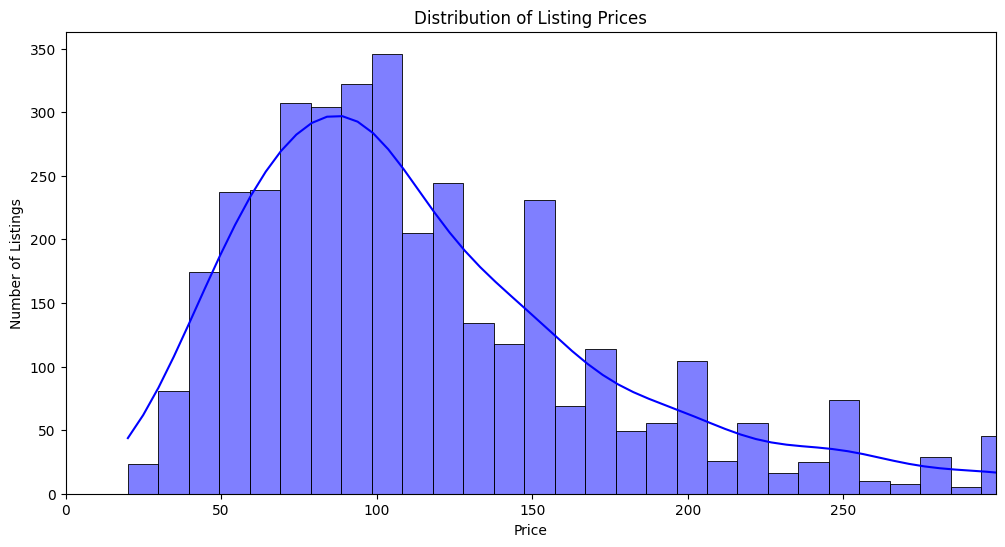

In [57]:
# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(listings_df_cleaned['price'], bins=100, kde=True, color="blue")
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.xlim(0, listings_df_cleaned['price'].quantile(0.95))  
plt.show()

In [58]:
listings_df_cleaned['price'].describe()

count    3810.000000
mean      128.052231
std        90.317390
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

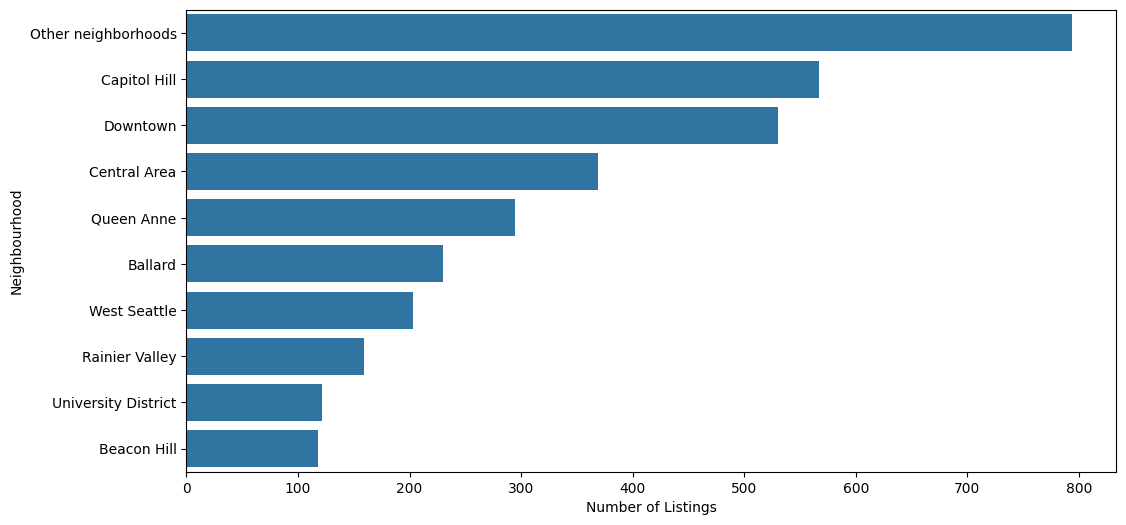

In [59]:
# Neighbourhoods distribution
neighbourhood_counts = listings_df['neighbourhood_group_cleansed'].value_counts().head(10) # Get top 10 neighbourhoods
plt.figure(figsize=(12, 6))
sns.barplot(x=neighbourhood_counts.values, y=neighbourhood_counts.index)
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()


* We will survey rental prices in the above neighbourhoods and evaluate the factors affecting these prices.

In [60]:
neighbourhoods = [
    'Capitol Hill', 
    'Downtown', 
    'Central Area',
    'Queen Anne', 
    'Ballard', 
    'West Seattle', 
    'Rainier Valley',
    'University District', 
    'Beacon Hill'
]

<Figure size 1200x600 with 0 Axes>

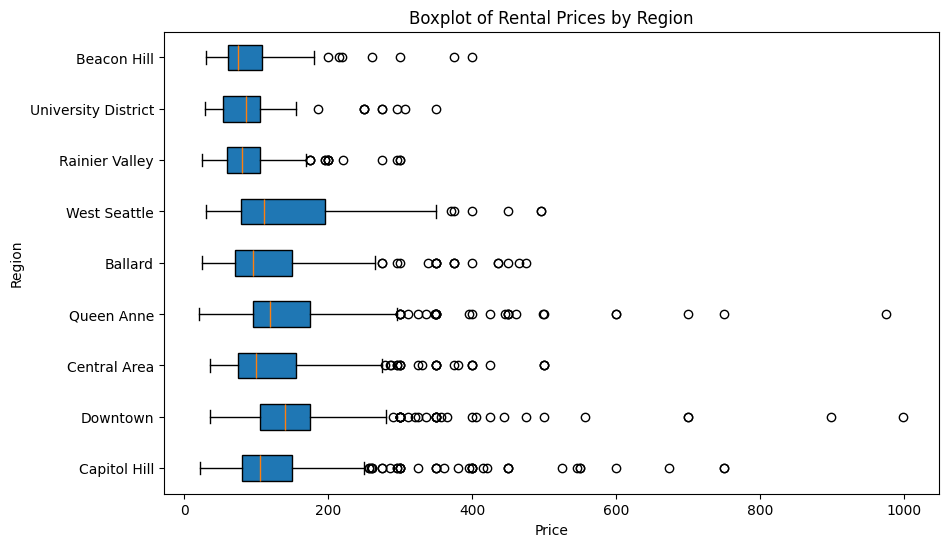

In [61]:
# Price distribution by each neighbourhoods
plt.figure(figsize=(12, 6))
price_neighbour_data = []
for neighbour in neighbourhoods:
    listings_neighbour_df = listings_df_cleaned[listings_df_cleaned['neighbourhood_group_cleansed'] == neighbour]
    price_neighbour_data.append(listings_neighbour_df['price'].values)

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(price_neighbour_data, vert=False, patch_artist=True, labels=neighbourhoods)

# Add labels and title
ax.set_xlabel("Price")
ax.set_ylabel("Region")
ax.set_title("Boxplot of Rental Prices by Region")

# Display the plotS
plt.show()

* We observe that rental prices in area Downtown, Queen Anne and Capitol Hill are highest price
* Beacon Hill, University District and Rainier Valley are lowest price 
* We will analyze how the number of rental listings affects prices, as it seems that areas with high demand tend to have higher prices.

[104.5 139.  100.  119.   95.  110.   80.   85.   75. ] [567 530 369 295 230 203 159 122 118]


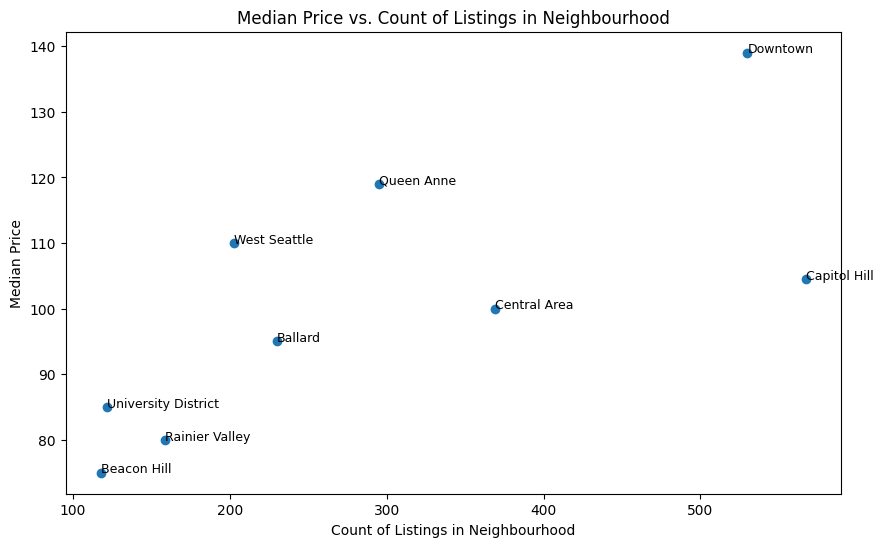

In [62]:
count_neighbour_data = [neighbourhood_counts[neighbour] for neighbour in neighbourhoods]
price_median_neighbour_data = [np.median(price_neighbour_data[i]) for i in range(len(price_neighbour_data))]

# Flatten any nested lists or arrays in price_median_neighbour_data
price_median_neighbour_data = [val if np.isscalar(val) else np.median(val) for val in price_median_neighbour_data]

count_neighbour_data = np.array(count_neighbour_data)
price_median_neighbour_data = np.array(price_median_neighbour_data)

print(price_median_neighbour_data, count_neighbour_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(count_neighbour_data, price_median_neighbour_data)

for i, neighbourhood in enumerate(neighbourhoods):
    plt.text(count_neighbour_data[i], price_median_neighbour_data[i], neighbourhood, fontsize=9, ha='left')

plt.xlabel("Count of Listings in Neighbourhood")
plt.ylabel("Median Price")
plt.title("Median Price vs. Count of Listings in Neighbourhood")
plt.show()


* We observe that areas with a higher number of rentals tend to have higher prices.

* Next, we will explore how various factors affect rental prices

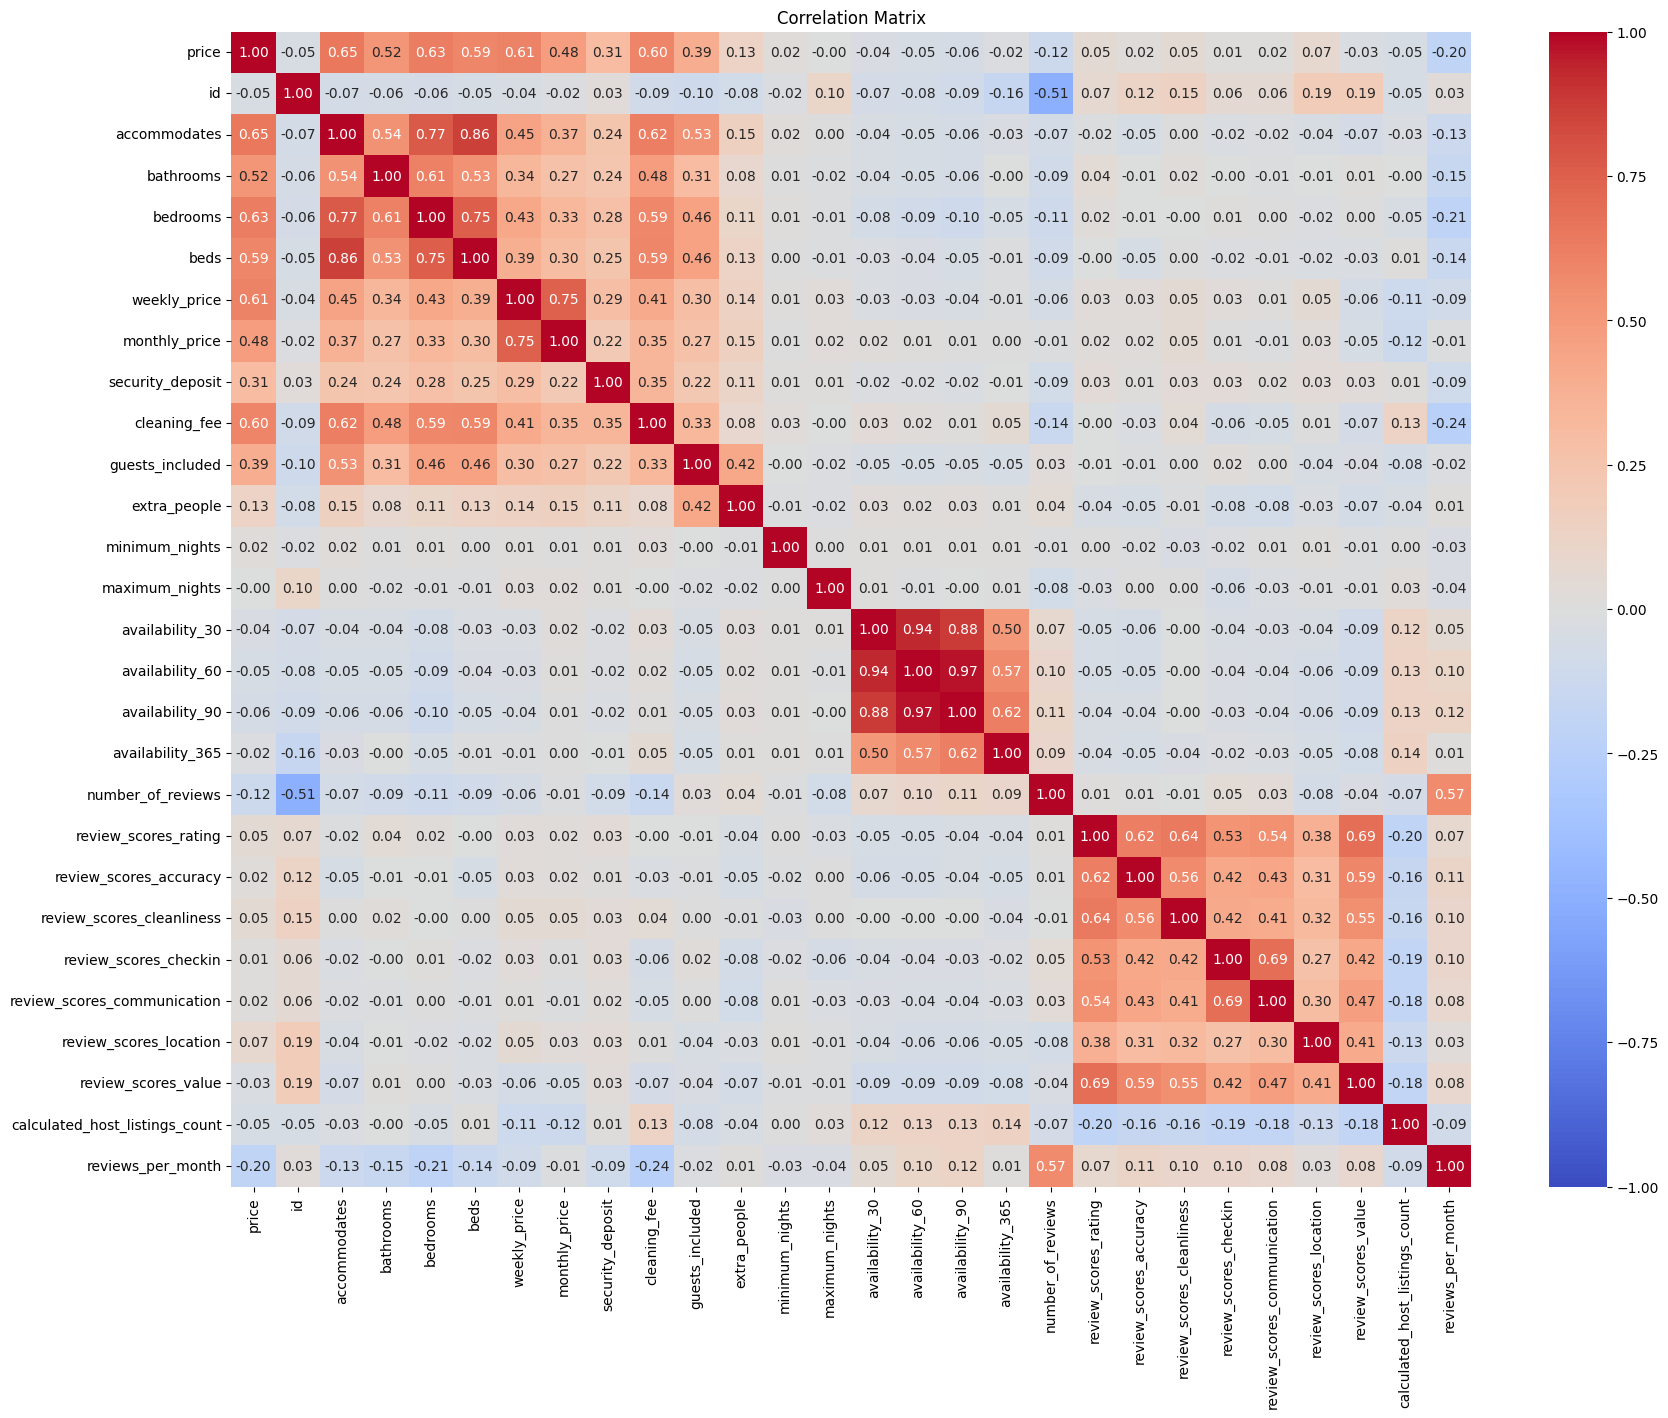

In [63]:
# Impact of numeric features
numerical_columns.remove('price')
numerical_columns.insert(0, 'price')

corr_matrix = listings_df_cleaned[numerical_columns].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


* The factors accommodates, bathrooms, bedrooms, beds, and cleaning_fee significantly affect rental prices

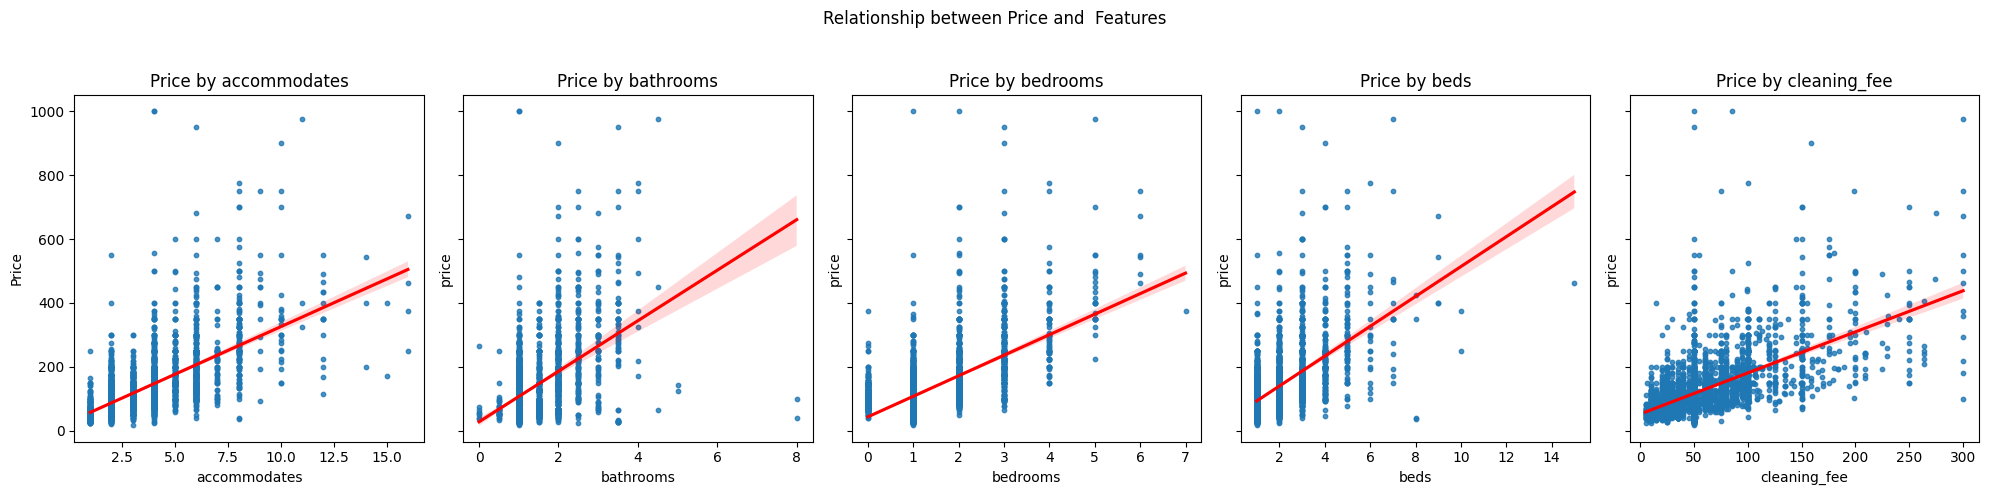

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)
fig.suptitle('Relationship between Price and  Features')

# Features impact to price
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee']

# Plot price by each feature in subplot
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='price', data=listings_df_cleaned, ax=axes[i], scatter_kws={"s": 10}, line_kws={"color": "red"})
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Price by {feature}')

axes[0].set_ylabel('Price')

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


* We observe the following:

1. The larger the capacity, the higher the price.
2. The number of bathrooms, bedrooms, and beds also affects the rental price.
3. As the rental price increases, the associated costs also rise.

* Next, we will examine the impact of categorical features on the price.

In [65]:
listings_df_cleaned.head()

,id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Queen Anne,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,650.0,2200.0,250.0,50.0,2,5.0,1,365,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Queen Anne,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,Queen Anne,West Queen Anne,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,650.0,2200.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,650.0,2300.0,250.0,50.0,1,0.0,1,1125,0,0,0,143,0,2015-09-21,2016-01-02,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.54
4,278830,Queen Anne,West Queen Anne,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,650.0,2200.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [66]:
# Category features may impact on 
categorical_features = ['is_location_exact', 'property_type', 'room_type', 'bed_type']

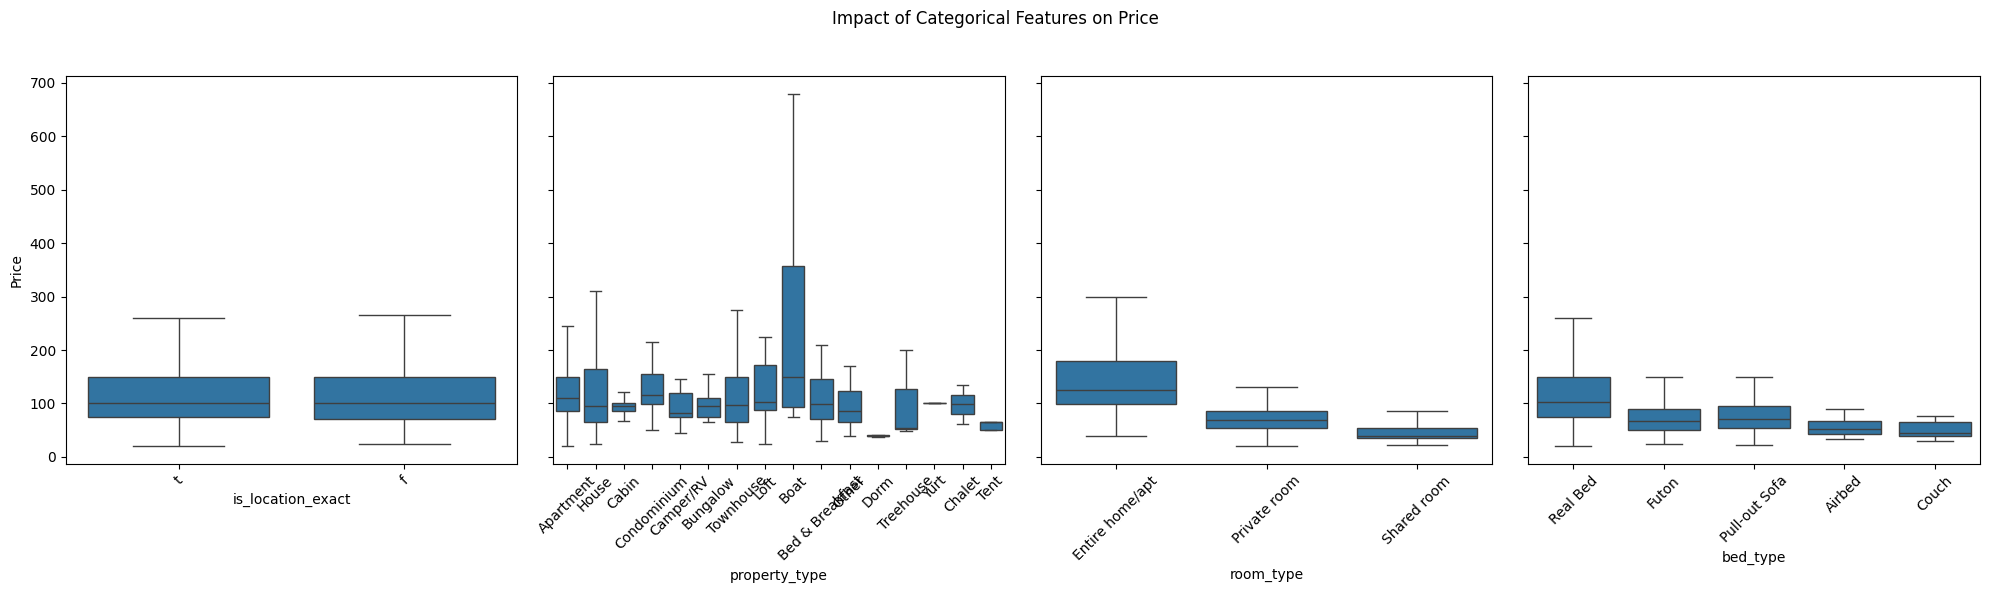

In [67]:
fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 6), sharey=True)
fig.suptitle('Impact of Categorical Features on Price')

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='price', data=listings_df_cleaned, ax=axes[i], showfliers=False)
    axes[i].set_xlabel(feature)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

axes[0].set_ylabel('Price')

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


In [68]:
# Median price of room types
for room_type in listings_df_cleaned['room_type'].unique():
    price_med = listings_df_cleaned.loc[listings_df_cleaned['room_type'] == room_type, 'price'].median()
    print(f'Room type: {room_type} - Price: {price_med}')

Room type: Entire home/apt - Price: 126.0
Room type: Private room - Price: 69.0
Room type: Shared room - Price: 40.0


In [69]:
# Median price of bed types
for bed_type in listings_df_cleaned['bed_type'].unique():
    price_med = listings_df_cleaned.loc[listings_df_cleaned['bed_type'] == bed_type, 'price'].median()
    print(f'Bed type: {bed_type} - Price: {price_med}')

Bed type: Real Bed - Price: 103.0
Bed type: Futon - Price: 68.0
Bed type: Pull-out Sofa - Price: 70.0
Bed type: Airbed - Price: 52.0
Bed type: Couch - Price: 45.0


* We can see that depending on the need to rent the entire home or just a room, as well as the type of bed provided, there will be a significant impact on the rental price. 
* Generally, the more convenient and comfortable, the higher the price.

* Next, we will explore what amenities are commonly provided in the highest-rated places

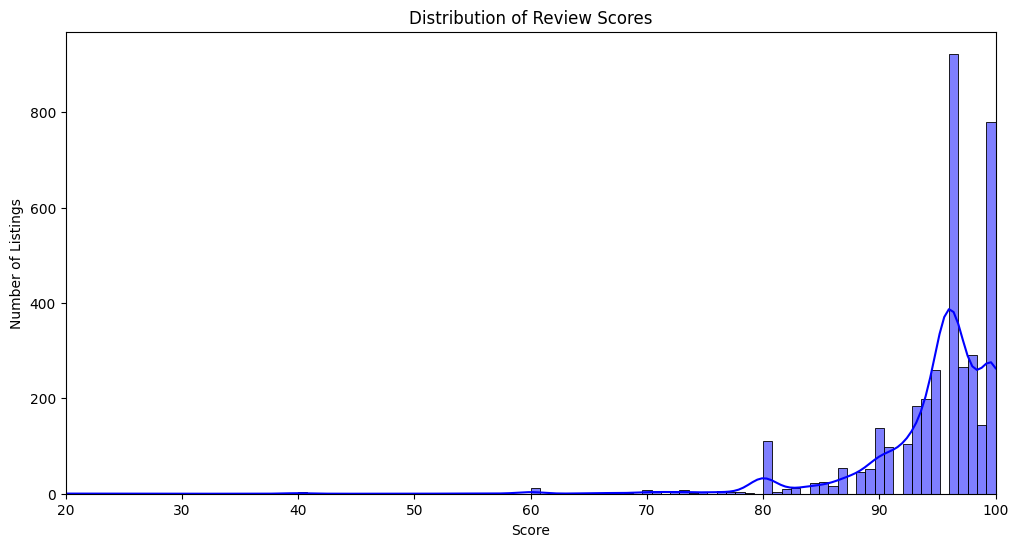

In [70]:
# Review score distribution
plt.figure(figsize=(12, 6))
sns.histplot(listings_df_cleaned['review_scores_rating'], bins=100, kde=True, color="blue")
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Number of Listings')
plt.xlim(20, listings_df_cleaned['review_scores_rating'].quantile(0.95))  
plt.show()

In [71]:
listings_df_cleaned['review_scores_rating'].describe()

count    3810.000000
mean       94.786089
std         6.048475
min        20.000000
25%        94.000000
50%        96.000000
75%        98.000000
max       100.000000
Name: review_scores_rating, dtype: float64

* Next compare the difference in amenities between the top 20% highest-rated and the bottom 20% lowest-rated listings.

In [72]:
low_20_percent = listings_df_cleaned[listings_df_cleaned['price'] <= listings_df_cleaned['price'].quantile(0.2)]
high_20_percent = listings_df_cleaned[listings_df_cleaned['price'] >= listings_df_cleaned['price'].quantile(0.8)]

In [73]:
# Count amenities
def split_amenities(raw_amenities_str):
    amenities = raw_amenities_str.strip("{}").replace('"','').split(',')
    return amenities

amenities_low_stack = sum([split_amenities(amenities) for amenities in low_20_percent['amenities'].values], [])
amenities_low_count = dict(Counter(amenities_low_stack))

amenities_high_stack = sum([split_amenities(amenities) for amenities in high_20_percent['amenities'].values], [])
amenities_high_count = dict(Counter(amenities_high_stack))

In [74]:
amenities_low_df = pd.DataFrame(list(amenities_low_count.items()), columns=['Amenity', 'Count'])
amenities_high_df = pd.DataFrame(list(amenities_high_count.items()), columns=['Amenity', 'Count'])

amenities_high_df = pd.merge(amenities_high_df, amenities_low_df, how='left', on='Amenity', suffixes=('_high', '_low'))
amenities_high_df = amenities_high_df.sort_values(by='Count_high', ascending=False)

amenities_high_df['abs_diff_rate'] = amenities_high_df.apply(
    lambda row: max(row['Count_high'] / row['Count_low'], row['Count_low'] / row['Count_high']), 
    axis=1
)

amenities_high_df[amenities_high_df['abs_diff_rate'] > 2]

,Amenity,Count_high,Count_low,abs_diff_rate
14,Family/Kid Friendly,574,252.0,2.277778
1,Cable TV,437,145.0,3.013793
4,Air Conditioning,207,99.0,2.090909
33,Elevator in Building,202,73.0,2.767123
32,Gym,130,44.0,2.954545
8,Pets live on this property,108,248.0,2.296296
11,Hot Tub,99,42.0,2.357143
26,Wheelchair Accessible,80,23.0,3.478261
39,Pool,54,12.0,4.500000
10,Cat(s),41,127.0,3.097561


* Based on the comparison table above, we can see that high-priced rentals tend to focus on expensive amenities like elevators, cable TV, air conditioning, and gyms. 
* In contrast, low-priced locations focus on services that do not require much investment, such as allowing pets or smoking.

* The remaining two data sources currently do not provide much information for analysis; further exploration may be needed to uncover insights.